# Линейные модели

In [2]:
from IPython.display import Image

<h1 align="center"> Обзор линейных моделей </h1>

#### Классификация

$$Y = \{+1, -1\},~X\in \mathbf{R}^d$$

$$y_{predict}(x) = sign(<w, x>) $$ 

$$margin(x, y) = y \cdot sign(<w, x>)$$

$$Q(w, X^\ell) = \frac{1}{n} \sum_i^n L(y_i, <w,x_i>) \rightarrow \min_w$$

#### Регрессия

$$Y = \mathbf{R},~X\in \mathbf{R}^d$$

$$y_{predict}(x) = <w, x> $$ 

$$Q(w, X^\ell) = \frac{1}{n} \sum_i^n L(y_i, <w,x_i>) \rightarrow \min_w$$

### Функции потерь

   - Hinge Loss : 
    $L_i(x, y; w) = max(0, 1 - y <w, x>)$
   - Logistic Loss:      $L_i(x, y; w) = log(1 + e^{-y <w, x>})$
   - Squared Loss:      $L_i(x, y; w) = (y - <w, x>)^2$

### Регуляризация

Регуляризация в статистике, машинном обучении, теории обратных задач — метод добавления некоторой дополнительной информации к условию с целью решить некорректно поставленную задачу или предотвратить переобучение.

- $L_{1}$-регуляризация (lasso regression): $L_{1}=\sum _{i}{(y_{i}-y(t_{i}))}^{2}+\lambda \sum _{i}{|a_{i}|}$   

- $L_{2}$ - регуляризация (Регуляризация Тихонова, ridge regression): $L_{2}=\sum _{i}{(y_{i}-y(t_{i}))}^{2}+\lambda \sum _{i}{a_{i}}^{2}$

<h1 align="center">Градиентный спуск</h1> 

Нормальное уравнение: $$w=(X^TX)^{-1}X^Ty$$

Главная проблема нормального уравнения:
* Сложно посчитать $X^{-1}$, если размерности $X$ большие

#### Градиентный спуск (Gradient Descent):
$$w_{k+1} = w_k - \alpha \nabla \sum_i L(w_k, x_i)$$

#### Стохастический градиентный спуск (Stochastic Gradient Descent):
$$w_{k+1} = w_k - \alpha \nabla L(w_k, x_i)$$


#### Достоинства и недостатки стохастического градиентного спуска
**Достоинства**
 - Подходит для онлайн-обучения
 - Подходит для обучения на любом размере выборки
 - Быстрее, чем классический градиентный спуск


**Недостатки и способы борьбы с ними**
 - Чувствителен к масштабу переменных (рекоммендация: привести переменные к одному масштабу) 
 - Переобучение и отсутствие стабильности (рекоммендация: регуляризовать модель)

## sklearn.linear_model

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

In [6]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

### Генерация данных

In [11]:
blobs = datasets.make_blobs(centers=2, cluster_std=3.5, random_state=1)
blobs

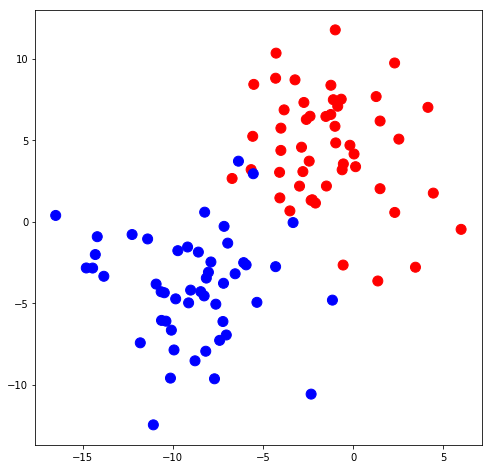

In [14]:
colors = ListedColormap(['red', 'blue'])

pylab.figure(figsize(8, 8))
pylab.scatter(list(map(lambda x: x[0], blobs[0])), 
              list(map(lambda x: x[1], blobs[0])), 
              c = blobs[1], 
              cmap = colors,
              s=100)

In [15]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(blobs[0],
                                                                                    blobs[1], 
                                                                                    test_size=0.3,
                                                                                    random_state=1)

### Линейная классификация

#### RidgeClassifier

In [16]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state=1)

In [17]:
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=1, solver='auto',
        tol=0.001)

In [19]:
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)

In [20]:
print(test_labels)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]


In [21]:
print(ridge_predictions)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1]


In [22]:
#оценка качества классификации
metrics.accuracy_score(test_labels, ridge_predictions)

0.9666666666666667

In [23]:
print('Intercept', ridge_classifier.intercept_ )
print('Coefficients', ridge_classifier.coef_)

Intercept [-0.50073421]
Coefficients [[-0.11164518 -0.0925014 ]]


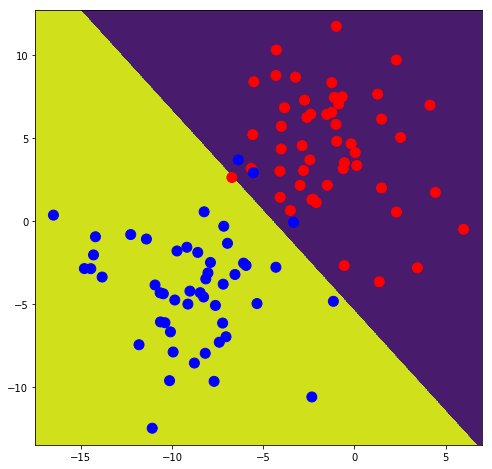

In [24]:
xx, yy = make_meshgrid(blobs[0][:, 0], blobs[0][:, 1])
fig, sub = plt.subplots()
plot_contours(sub, ridge_classifier, xx, yy)
pylab.scatter(list(map(lambda x: x[0], blobs[0])), 
              list(map(lambda x: x[1], blobs[0])), 
              c = blobs[1], 
              cmap = colors,
              s=100)

#### LogisticRegression

In [25]:
log_regressor = linear_model.LogisticRegression(random_state=0)

In [26]:
log_regressor.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
lr_predictions = log_regressor.predict(test_data)

In [28]:
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [33]:
print(metrics.roc_auc_score(test_labels, lr_predictions))

0.8888888888888888


In [34]:
print(metrics.roc_auc_score(test_labels, lr_proba_predictions[:,1]))

1.0


In [35]:
print(metrics.accuracy_score(test_labels, lr_predictions))

0.8666666666666667


In [36]:
print(metrics.accuracy_score(test_labels, ridge_predictions))

0.9666666666666667


In [37]:
print('Intercept', log_regressor.intercept_ )
print('Coefficient', log_regressor.coef_)

Intercept [-1.79188992]
Coefficient [[-0.78280739 -0.68391652]]


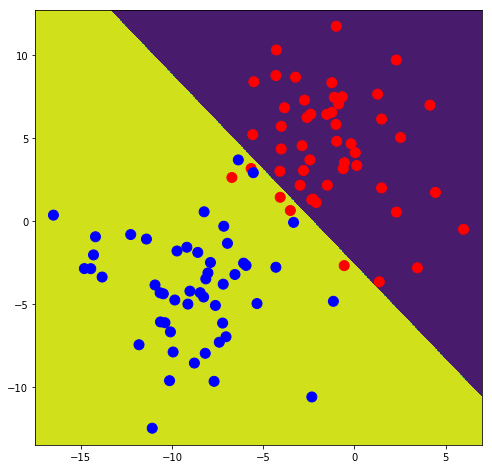

In [38]:
xx, yy = make_meshgrid(blobs[0][:, 0], blobs[0][:, 1])
fig, sub = plt.subplots()
plot_contours(sub, log_regressor, xx, yy)
pylab.scatter(list(map(lambda x: x[0], blobs[0])), 
              list(map(lambda x: x[1], blobs[0])), 
              c = blobs[1], 
              cmap = colors,
              s=100)

### Оценка качества по cross-validation

In [44]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0],  blobs[1], scoring='accuracy',  cv=10)
print('Ridge mean:{}, max:{}, min:{}, std:{:2f}'.format(ridge_scoring.mean(),   ridge_scoring.max(), ridge_scoring.min(), ridge_scoring.std()))

Ridge mean:0.9700000000000001, max:1.0, min:0.9, std:0.045826


In [45]:
lr_scoring = model_selection.cross_val_score(log_regressor,blobs[0],blobs[1],scoring='accuracy',cv=10)
print('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(),lr_scoring.max(), lr_scoring.min(),lr_scoring.std()))

Log mean:0.9400000000000001, max:1.0, min:0.8, std:0.07999999999999999


#### cross_val_score с заданными scorer и cv_strategy

In [63]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [64]:
cv_strategy = model_selection.StratifiedShuffleSplit(n_splits=20,
                                                     test_size=0.3,
                                                     random_state=2)

In [65]:
ridge_scoring = model_selection.cross_val_score(ridge_classifier,
                                                blobs[0],
                                                blobs[1],
                                                scoring=scorer,
                                                cv=cv_strategy.split(X=blobs[0], y=blobs[1]))

In [66]:
print('Ridge mean:{}, max:{}, min:{}, std:{:2f}'.format(ridge_scoring.mean(),   ridge_scoring.max(), ridge_scoring.min(), ridge_scoring.std()))

Ridge mean:0.958333333333333, max:1.0, min:0.9, std:0.027639


In [67]:
lr_scoring = model_selection.cross_val_score(log_regressor,
                                             blobs[0],
                                             blobs[1],
                                             scoring=scorer,
                                             cv=cv_strategy.split(X=blobs[0], y=blobs[1]))

In [68]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(),lr_scoring.max(), lr_scoring.min(),lr_scoring.std()))

Log mean:0.9499999999999998, max:1.0, min:0.8666666666666667, std:0.03574601764921202


### Линейная регрессия

#### Генерация данных

In [70]:
data, target, coef = datasets.make_regression(n_features=2,
                                              n_informative=1,
                                              n_targets=1, 
                                              noise=5.,
                                              coef=True,
                                              random_state=2)

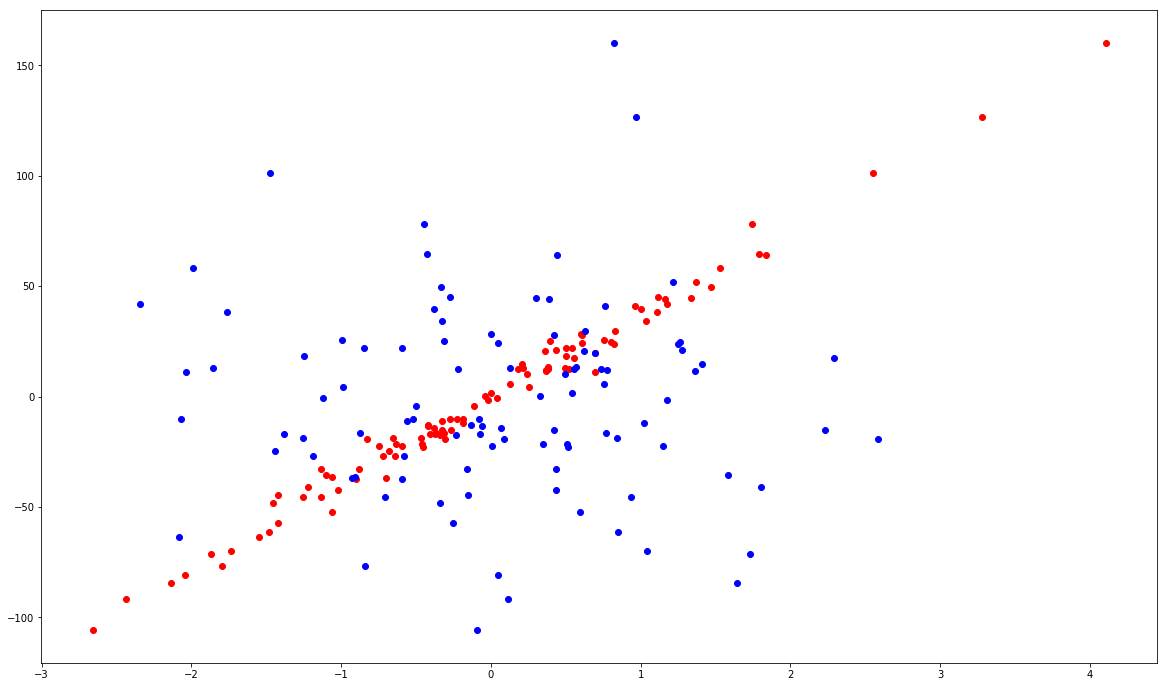

In [72]:
plt.figure(figsize=(20, 12))
pylab.scatter(list(map(lambda x: x[0], data)), target, color='r')
pylab.scatter(list(map(lambda x: x[1], data)), target, color='b')

In [73]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data,
                                                                                    target,  
                                                                                    test_size=0.3)

#### LinearRegression

In [74]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [77]:
metrics.mean_absolute_error(test_labels, predictions)

4.3734297915252

In [78]:
linear_scoring = model_selection.cross_val_score(linear_regressor,
                                                 data,
                                                 target,
                                                 scoring='neg_mean_absolute_error', 
                                                 cv=10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779697, std: 1.0737104492890206


In [79]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=True)

In [80]:
linear_scoring = model_selection.cross_val_score(linear_regressor,
                                                 data,
                                                 target,
                                                 scoring=scorer, 
                                                 cv=10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779697, std: 1.0737104492890206


In [90]:
print("y = {:.2f} + {:.2f}*x1 + {:.2f}*x2".format(linear_regressor.intercept_, linear_regressor.coef_[0], linear_regressor.coef_[1]))

y = 0.05 + 38.20*x1 + 0.47*x2


#### Lasso

In [87]:
lasso_regressor = linear_model.Lasso(random_state=3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [88]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor,
                                                data,
                                                target,
                                                scoring=scorer,
                                                cv=10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666397, std: 1.0170354384993354


In [91]:
print("y = {:.2f} + {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.intercept_,lasso_regressor.coef_[0],lasso_regressor.coef_[1]))

y = 0.14 + 37.42*x1 + 0.00*x2


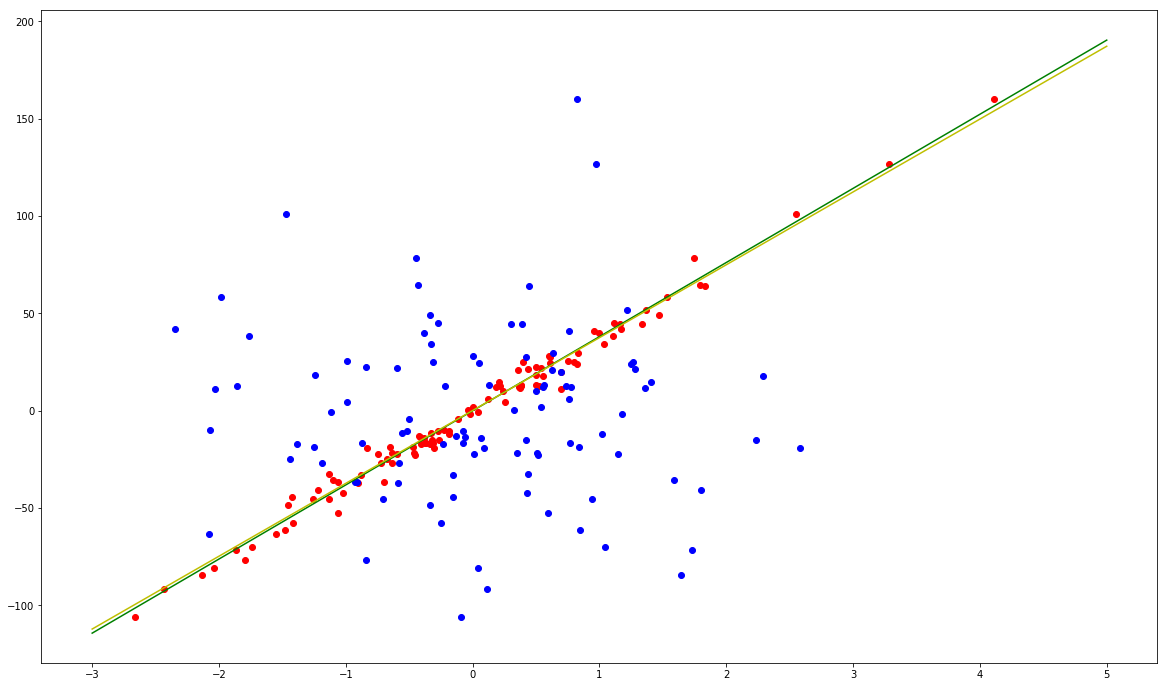

In [92]:
plt.figure(figsize=(20, 12))
pylab.scatter(list(map(lambda x: x[0], data)), target, color='r')
pylab.scatter(list(map(lambda x: x[1], data)), target, color='b')

x_points = np.linspace(-3, 5)
y_points_gt = x_points * coef[0]
y_points_lasso = (x_points * lasso_regressor.coef_[0]
                  + lasso_regressor.intercept_)
plt.plot(x_points, y_points_gt, c='g')
plt.plot(x_points, y_points_lasso, c='y')